In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
data = np.load(r'D:\博士工作\第三篇论文_MHW_AI\data\WEIO\expand_WEIO\SST_93_19_expand_WEIO_area.npz')
data.files

['time', 'lat', 'lon', 'sst']

In [4]:
sst = data['sst'][:]
sst.shape

(9861, 66, 49)

In [11]:
sst_case1 = sst[9621:9665,:,:]

In [13]:
def t_tendency(mlt):
    # Description - temperature tendency term of heat budget
    # input
    # mlt - 3D daily mixed-layer temperature data to calculate tendency of heat budget, specified as a
    #   three dimensions matrix m-by-n-by-t. m and n separately indicate two spatial dimensions
    #   and t indicates temporal dimension.
    # output
    # tt - temperature tendency
    tt = mlt[:, :, 1:] - mlt[:, :, :-1]  # unit: deg/day
    return tt

In [14]:
sst_case1 = np.where(sst_case1<-100, np.nan, sst_case1)
sst_case1

array([[[28.859999, 28.82    , 28.81    , ..., 29.55    , 29.71    ,
         29.779999],
        [29.029999, 29.019999, 29.06    , ..., 29.47    , 29.599998,
         29.699999],
        [29.179998, 29.22    , 29.289999, ..., 29.439999, 29.59    ,
         29.66    ],
        ...,
        [30.71    , 30.8     , 30.949999, ..., 30.49    , 30.46    ,
         30.41    ],
        [30.699999, 30.76    , 30.869999, ..., 30.47    , 30.47    ,
         30.48    ],
        [30.689999, 30.679998, 30.73    , ..., 30.5     , 30.529999,
         30.55    ]],

       [[29.06    , 29.109999, 29.08    , ..., 29.71    , 29.8     ,
         29.859999],
        [29.14    , 29.16    , 29.22    , ..., 29.699999, 29.84    ,
         29.88    ],
        [29.179998, 29.24    , 29.31    , ..., 29.699999, 29.849998,
         29.91    ],
        ...,
        [30.57    , 30.599998, 30.679998, ..., 30.49    , 30.47    ,
         30.46    ],
        [30.51    , 30.539999, 30.599998, ..., 30.48    , 30.49    ,
   

In [15]:
sst_case1 = sst_case1.transpose(1,2,0)
sst_case1.shape

(66, 49, 44)

In [20]:
tt = t_tendency(sst_case1)

In [22]:
tt = tt.transpose(2,0,1)
tt.shape

(43, 66, 49)

In [24]:
tt_mean = np.nanmean(tt, axis = 0)
tt_mean.shape

(66, 49)

In [25]:
# #对维度倒叙
list3 = []
for i in range(66):
    for j in range(49):
        list3.append(tt_mean[-i-1, j])

tt_mean0 = np.array(list3)
tt_mean0 = tt_mean0.reshape(66,49)

In [26]:
tt_mean0

array([[-0.06674416, -0.06418601, -0.06511626, ..., -0.02860468,
        -0.0304651 , -0.03186049],
       [-0.06697673, -0.06511631, -0.06674416, ..., -0.02813951,
        -0.02953489, -0.0304651 ],
       [-0.07488371, -0.06906975, -0.06813955, ..., -0.0288372 ,
        -0.02930233, -0.02906977],
       ...,
       [-0.0288372 , -0.03255813, -0.0337209 , ..., -0.01279068,
        -0.01930232, -0.02093022],
       [-0.02139535, -0.02255812, -0.02325581, ..., -0.01604652,
        -0.02023253, -0.02325581],
       [-0.01697673, -0.01651165, -0.0139535 , ..., -0.01976745,
        -0.02395346, -0.02674418]], dtype=float32)

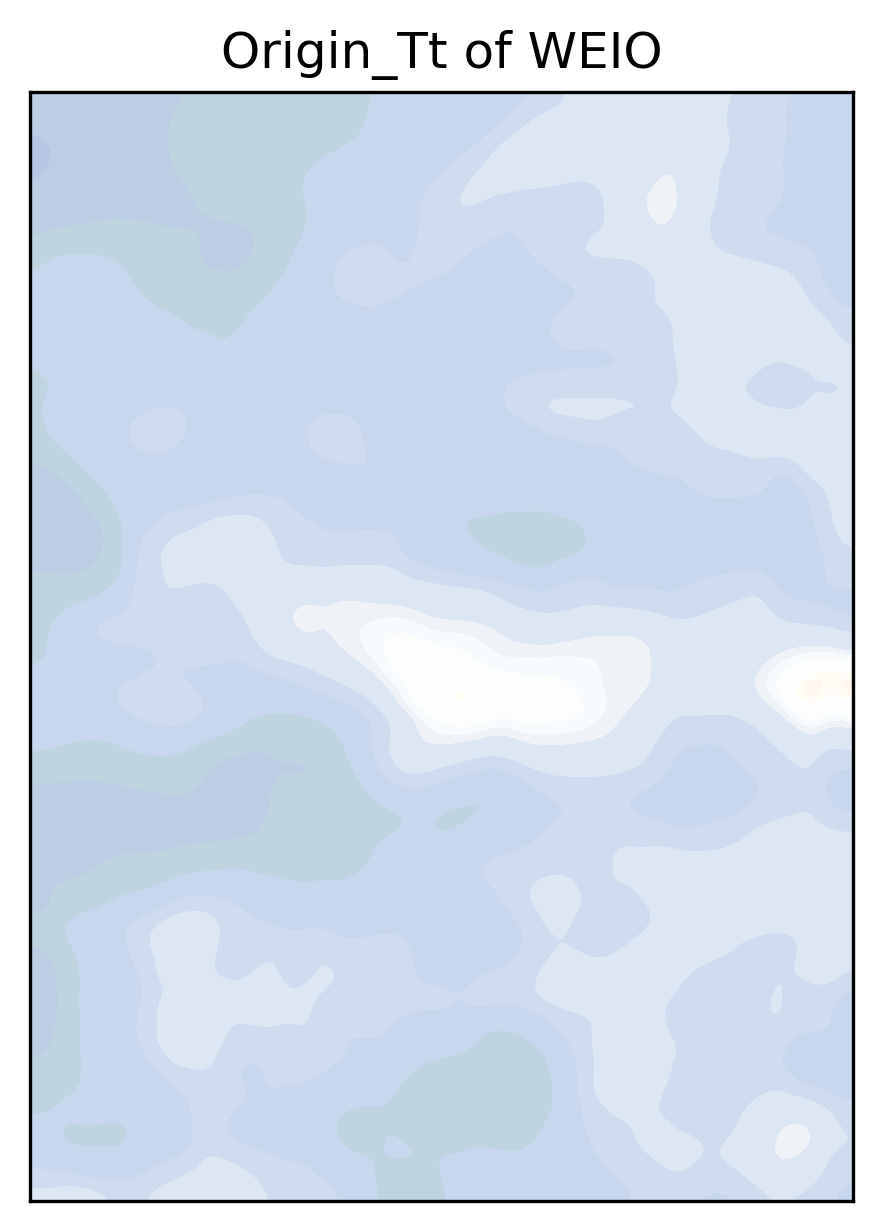

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Create a 2D array of random numbers
data = tt_mean0

plt.figure(dpi=300)  # Set the dpi value

colors = ['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', '#bbcde9',
'#c3d2eb', '#d5e0f0', '#ebf1f7', '#f7fbfd', '#fcfefc', '#fdfdfe', '#fdfdfe', '#fefefe',
'#fff8f2','#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')  # set the color for NaN values to lightgrey

# Create a ScalarMappable with a normalized color map
norm = BoundaryNorm([-3, -1.5, -0.5, -0.25, -0.125, -0.075, -0.05, -0.0375, -0.025, -0.0185, -0.01,
                     -0.0075, -0.005, -0.00375, -0.0025, -0.00125, 0, 0.00125,
                     0.0025, 0.00375, 0.005, 0.0075, 0.01, 0.0125, 0.025, 0.0375, 0.05, 0.075, 0.125,
                     0.25, 0.5, 1, 1.5], cmap_custom.N)
sm = cm.ScalarMappable(cmap=cmap_custom, norm=norm)
sm.set_array([])

plt.imshow(data, cmap=cmap_custom, norm=norm, interpolation='bicubic', alpha=0.8)

# Add the color bar with the custom color map

# cbar = plt.colorbar(sm, shrink=0.85)
# cbar.set_ticks([-1.5, -0.025, 0, 0.025, 1.5])  # Optional: Set custom ticks
# cbar.set_ticklabels([-1.5, -0.025, 0, 0.025, 1.5])  # Optional: Set custom tick labels

# # 设置x轴刻度位置和标签
# plt.xticks([0, 60, 120, 180, 240], ['105°E', '110°E', '115°E', '120°E', '125°E'])  # 设置刻度的位置和标签
# plt.yticks([0, 60, 120, 180, 240], ['25°N', '20°N', '15°N', '10°N', '5°N'])  # 设置刻度的位置和标签
plt.xticks([])
plt.yticks([])
plt.title('Origin_Tt of WEIO')

# cbar.set_label('℃/day', rotation=0, labelpad=-40)  # 添加单位
# cbar.ax.yaxis.set_label_coords(0.7, -0.03)

# 设置x和y轴的刻度线朝内
plt.tick_params(axis='x', direction='in', length=2, width=1, colors='k', grid_color='r')
plt.tick_params(axis='y', direction='in', length=2, width=1, colors='k', grid_color='r')

plt.show()

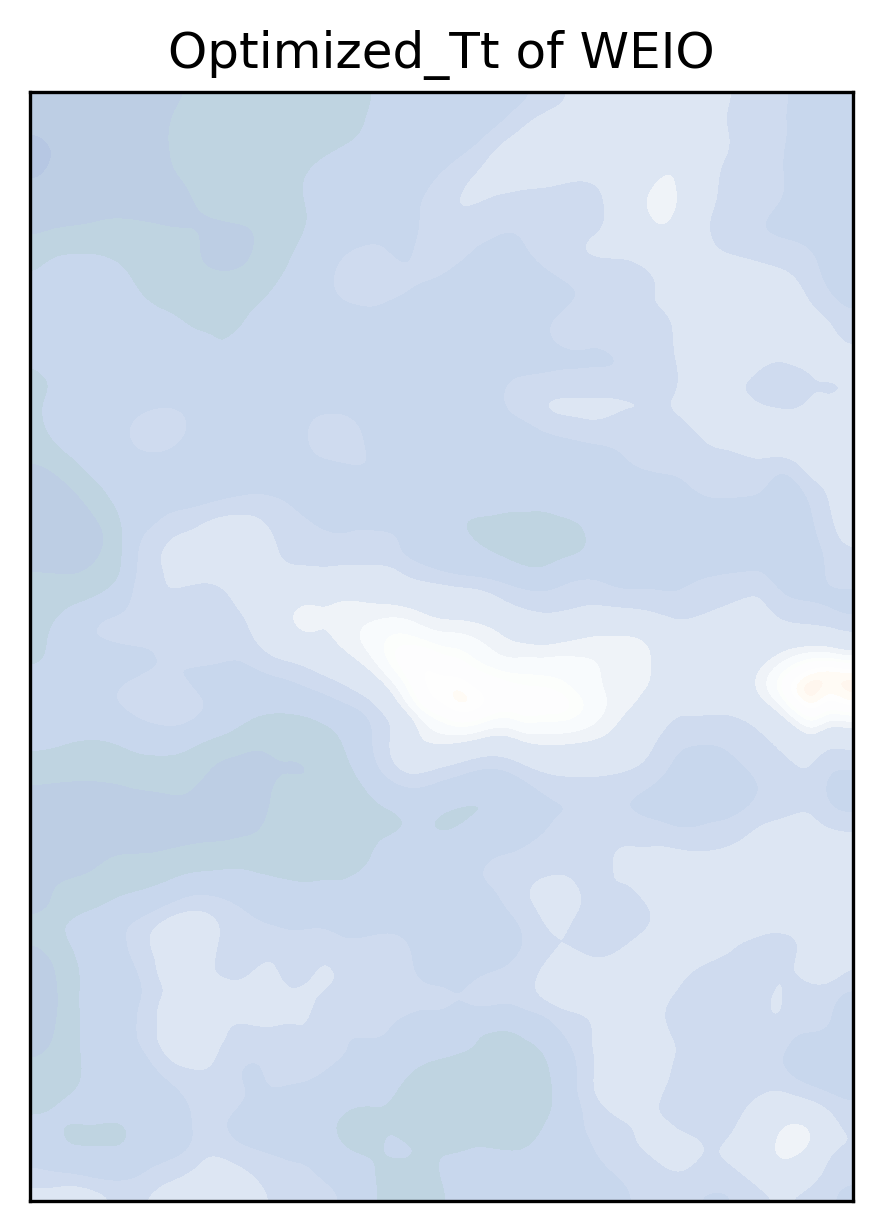

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Create a 2D array of random numbers
data = tt_mean0

plt.figure(dpi=300)  # Set the dpi value

colors = ['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', '#bbcde9',
'#c3d2eb', '#d5e0f0', '#ebf1f7', '#f7fbfd', '#fcfefc', '#fdfdfe', '#fdfdfe', '#fefefe',
'#fff8f2','#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')  # set the color for NaN values to lightgrey

# Create a ScalarMappable with a normalized color map
norm = BoundaryNorm([-3, -1.5, -0.5, -0.25, -0.125, -0.075, -0.05, -0.0375, -0.025, -0.0185, -0.01,
                     -0.0075, -0.005, -0.00375, -0.0025, -0.00125, 0, 0.00125,
                     0.0025, 0.00375, 0.005, 0.0075, 0.01, 0.0125, 0.025, 0.0375, 0.05, 0.075, 0.125,
                     0.25, 0.5, 1, 1.5], cmap_custom.N)
# norm = BoundaryNorm([-5, -4.7, -4.4, -4.1, -3.8, -3.5, -3.2, -2.9, -2.6, -2.3, -2,
#                      -1.7, -1.4, -1.1, -0.8, -0.5, 0, 0.5,
#                      0.8, 1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8,
#                      4.1, 4.4, 4.7, 5], cmap_custom.N)
sm = cm.ScalarMappable(cmap=cmap_custom, norm=norm)
sm.set_array([])

plt.imshow(data, cmap=cmap_custom, norm=norm, interpolation='bicubic', alpha=0.8)

# Add the color bar with the custom color map

# cbar = plt.colorbar(sm, shrink=0.85)
# cbar.set_ticks([-1.5, -0.025, 0, 0.025, 1.5])  # Optional: Set custom ticks
# cbar.set_ticklabels([-1.5, -0.025, 0, 0.025, 1.5])  # Optional: Set custom tick labels

# # 设置x轴刻度位置和标签
# plt.xticks([0, 60, 120, 180, 240], ['105°E', '110°E', '115°E', '120°E', '125°E'])  # 设置刻度的位置和标签
# plt.yticks([0, 60, 120, 180, 240], ['25°N', '20°N', '15°N', '10°N', '5°N'])  # 设置刻度的位置和标签
plt.xticks([])
plt.yticks([])
plt.title('Optimized_Tt of WEIO')

# cbar.set_label('℃/day', rotation=0, labelpad=-40)  # 添加单位
# cbar.ax.yaxis.set_label_coords(0.7, -0.03)

# 设置x和y轴的刻度线朝内
plt.tick_params(axis='x', direction='in', length=2, width=1, colors='k', grid_color='r')
plt.tick_params(axis='y', direction='in', length=2, width=1, colors='k', grid_color='r')

plt.show()

In [10]:
from datetime import datetime

date1 = datetime(1993, 1, 1)
date2 = datetime(2019, 6, 19)

delta = date2 - date1
print(delta.days)  # 输出365

9665


In [38]:
np.savez(r'C:\Users\mymylove\Desktop\论文相关\第三篇论文_HeatWave\WEIO\figure_case1\Origin_Tt.npz',
        Origin_Tt = tt_mean0)

In [39]:
np.savez(r'C:\Users\mymylove\Desktop\论文相关\第三篇论文_HeatWave\WEIO\figure_case1\Optimized_Tt.npz',
        Optimized_Tt = tt_mean0)